### Hypothesis: Income bias based on working class

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("census.csv")

In [3]:
df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'gender', 'hours_per_week',
       'native_country', 'greater_than_50k'],
      dtype='object')

In [27]:
dist_df = pd.concat([df[df.greater_than_50k == 1]
    .groupby('workclass').workclass.count(),
    df[df.greater_than_50k == 0].groupby('workclass').workclass.count()], axis=1, sort=False)

In [28]:
dist_df.columns = ["work_class_gt_50k", "work_class_lt_50k"]

In [49]:
dist_calc = dist_df.work_class_gt_50k / (dist_df.work_class_lt_50k + dist_df.work_class_gt_50k)  
dist_calc.sort_values(ascending=False, inplace=True)
dist_calc

 Self-emp-inc        0.557348
 Federal-gov         0.386458
 Local-gov           0.294792
 Self-emp-not-inc    0.284927
 State-gov           0.271957
 Private             0.218683
 Never-worked             NaN
 Without-pay              NaN
dtype: float64

Text(0,0.5,'Percentage of People')

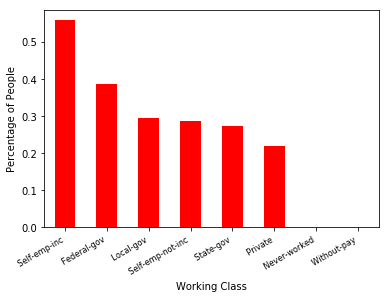

In [31]:
ax = dist_calc.plot(kind="bar", color="r", y="Percentage")
ax.set_xticklabels(dist_calc.index, rotation=30, fontsize=8, ha="right") 
ax.set_xlabel("Working Class")
ax.set_ylabel("Percentage of People")

### Conclusion: <br/>There are more self-employed people earning above \$50K than any other class.